# Data Preprocessing Overview

In [ ]:
import pandas as pd

In [ ]:
churn_data = pd.read_csv("churn_data.csv")
churn_data.head(2)

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium


In [ ]:
print(churn_data.shape)

(14999, 10)


## Data Cleaning
1. Drop duplicates

In [ ]:
duplicate_rows = churn_data.duplicated()
duplicate_rows

,0
0,False
1,False
2,False
3,False
4,False
...,...
14994,True
14995,True
14996,True
14997,True


In [ ]:
duplicate_rows.sum()

2966

In [ ]:
duplicate_part = churn_data[churn_data.duplicated()].sort_values(by=churn_data.columns.tolist())
print(duplicate_part.shape)
duplicate_part.iloc[4:10,:]

(2966, 10)


,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
12652,0.09,770.0,six,290.0,4+,no,yes,no,technical,medium
14863,0.09,770.0,six,290.0,4+,no,yes,no,technical,medium
12278,0.09,780.0,six,254.0,4+,no,yes,no,support,low
14489,0.09,780.0,six,254.0,4+,no,yes,no,support,low
12477,0.09,790.0,six,275.0,4+,no,yes,no,sales,low
14688,0.09,790.0,six,275.0,4+,no,yes,no,sales,low


In [ ]:
churn_data.drop_duplicates(inplace=True)

In [ ]:
churn_data.shape

(12033, 10)

In [ ]:
duplicate_rows = churn_data.duplicated()
duplicate_rows.sum()

0

In [ ]:
# Reading and understanding documentation
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

churn_data = pd.read_csv("churn_data.csv")
churn_data.drop_duplicates()
churn_data.shape

(14999, 10)

*Activity question 1: why number of rows remins same even after dropping duplicates?*

2. Handling missing values


*   Dropping rows with any of the columns containing missing values
*   Data imputation of numeric columns




In [ ]:
# churn_data = churn_data.dropna()
churn_data.isna().sum()
# churn_data.isna().sum()/churn_data.shape[0]*100

,0
satisfaction,9
evaluation,63
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [ ]:
churn_data["satisfaction"] = churn_data["satisfaction"].fillna(churn_data["satisfaction"].mean())

In [ ]:
churn_data.isna().sum()

,0
satisfaction,0
evaluation,63
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


*Activity question 2: How do we decide between type of numerical data imputation (mean/median) to use ?*

3. Remove redundant columns

In [ ]:
# churn_data.columns.duplicated()
dup_cols = churn_data.columns.duplicated()
churn_data = churn_data.loc[:,~dup_cols].copy()

*Activity question 3: How can I make sure no redundant column exists with a different name ?*

In [ ]:
churn_data.head(2)

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium


In [ ]:
churn_data["happiness"] = churn_data["satisfaction"]
churn_data.head(2)

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary,happiness
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low,0.38
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium,0.80


In [ ]:
churn_data.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [ ]:
# import seaborn as sns
# churn_num = churn_data.select_dtypes(include='number')
# sns.heatmap(churn_num.corr())

4. Outlier identification and removal

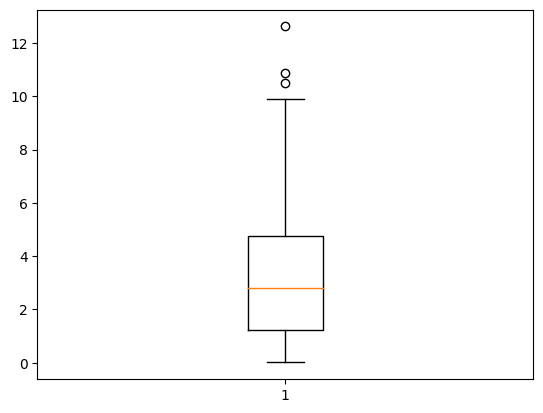

In [ ]:
import matplotlib.pyplot as plt
repay_loans = pd.read_csv("repay_loans.csv").dropna()
repay_loans.head(2)
rate = repay_loans["rate"]
plt.boxplot(rate)
plt.show()

In [ ]:
import numpy as np
q1 = np.quantile(rate, 0.25)
q3 = np.quantile(rate, 0.75)
iqr = q3-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)

In [ ]:
repay_loans = repay_loans[repay_loans["rate"]<upper_bound]

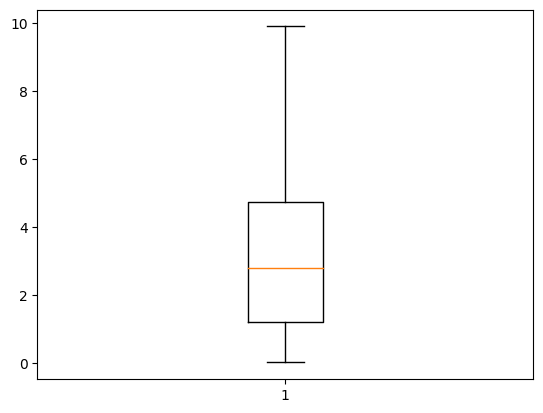

In [ ]:
plt.boxplot(repay_loans["rate"])
plt.show()

*Activity question 4: What will be the mathematical expression to remove an outlier below from the lower bound?*



In [ ]:
# repay_loans = repay_loans[repay_loans["rate"]>lower_bound]

5. Noise removal by moving average (optional)

## Data Transformation
1. Min-Max scaling

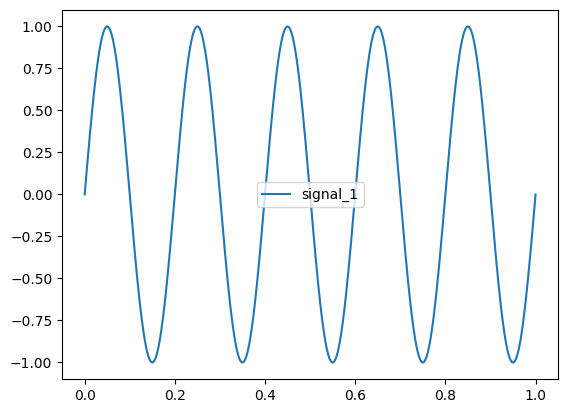

In [ ]:
t = np.linspace(0, 1, 1000)
signal_1 = np.sin(2*np.pi*5*t)
plt.plot(t, signal_1, label='signal_1')
plt.legend()
plt.show()

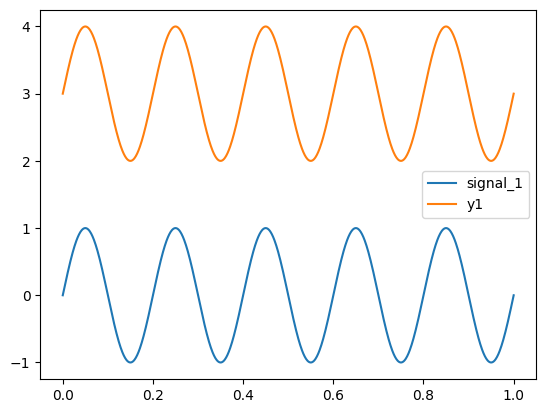

In [ ]:
y1 = 3+signal_1
plt.plot(t, signal_1, label="signal_1")
plt.plot(t, y1, label="y1")
plt.legend()

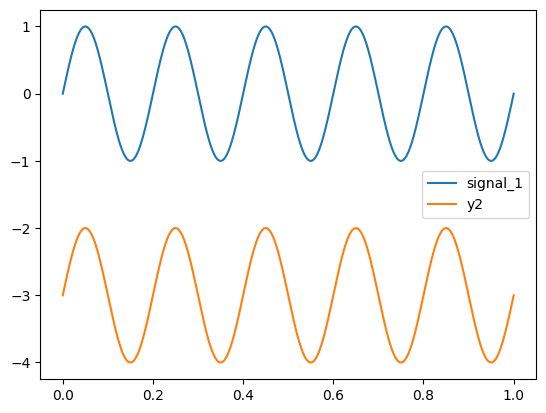

In [ ]:
y2 = signal_1-3
plt.plot(t, signal_1, label="signal_1")
plt.plot(t, y2, label="y2")
plt.legend()

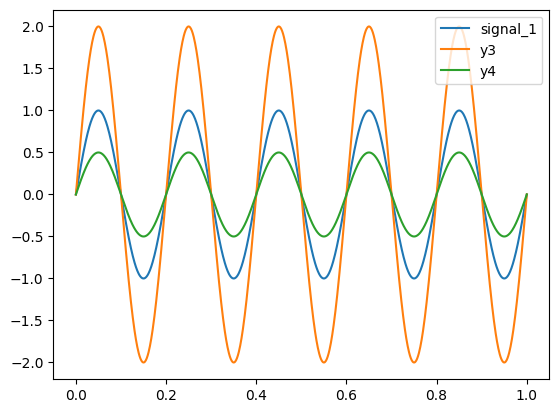

In [ ]:
y3 = signal_1*2
y4 = signal_1*0.5
plt.plot(t, signal_1, label="signal_1")
plt.plot(t, y3, label="y3")
plt.plot(t, y4, label="y4")
plt.legend()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

scale_slider = widgets.FloatSlider(value=1, min=0.0, max=5, step=0.1, description='Scale:')
shift_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='Shift:')

output_plot = widgets.Output()

def update_plot(change):
    with output_plot:
        clear_output(wait=True)  # Clear the previous plot
        scaled_y1 = scale_slider.value * signal_1 + shift_slider.value
        plt.plot(t, scaled_y1)
        plt.xlabel('t')
        plt.ylabel('transformed signal')
        plt.title('Shifted and Scaled signal_1')
        plt.grid(True)
        plt.ylim([-10, 10])
        plt.show()

scale_slider.observe(update_plot, 'value')
shift_slider.observe(update_plot, 'value')

display(scale_slider, shift_slider, output_plot)
update_plot(None)

FloatSlider(value=1.0, description='Scale:', max=5.0)

FloatSlider(value=0.0, description='Shift:', max=5.0, min=-5.0)

Output()

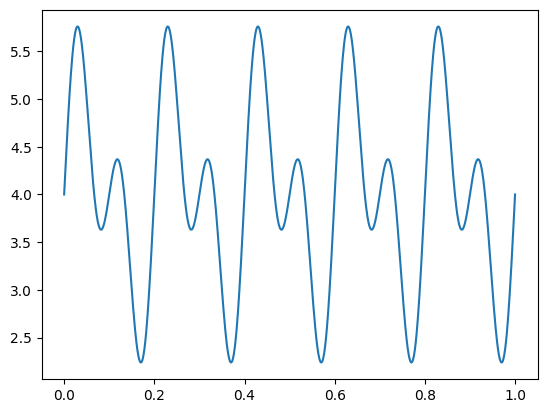

In [ ]:
t = np.linspace(0, 1, 1000)
signal_1 = np.sin(2*np.pi*5*t)
signal_2 = np.sin(2*np.pi*10*t)
signal_3 = signal_1+signal_2+4
plt.plot(t, signal_3)
plt.show()

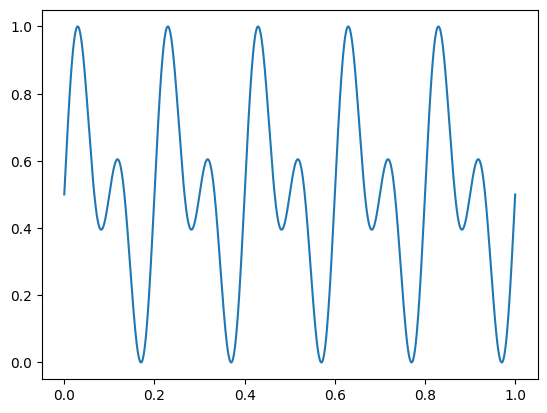

In [ ]:
y_scaled = (signal_3-min(signal_3))/(max(signal_3)-min(signal_3))
plt.plot(t, y_scaled)
plt.show()

In [ ]:
y_scaled.shape

(1000,)

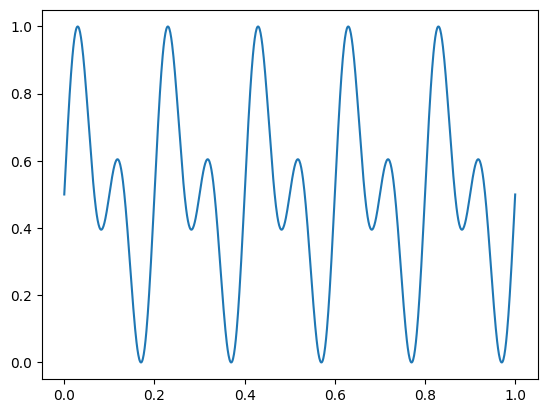

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
signal_3 = signal_3.reshape(-1,1)
scaler.fit(signal_3)
y_scaled_lib = scaler.transform(signal_3)
plt.plot(t, y_scaled_lib)
plt.show()

In [ ]:
y_scaled_lib.shape

(1000, 1)

*Activity question 5: What will be the maximum, minimum, and mean of any numeric feature after min-max scaling?*

2. Standard scaling/z-score

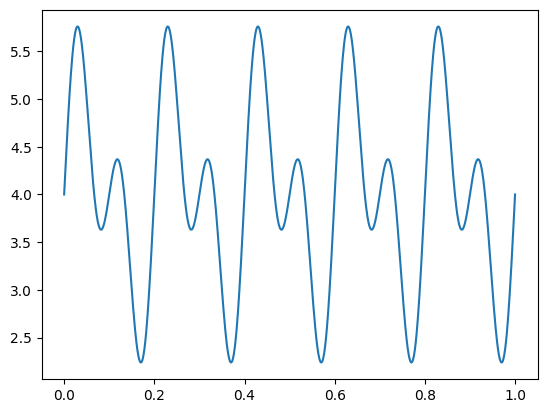

In [ ]:
plt.plot(t, signal_3)

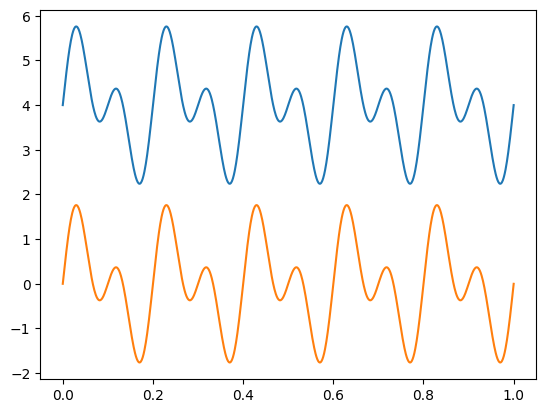

In [ ]:
# z = (x - u) / s Also known as z-score
zscore = (signal_3-np.mean(signal_3))/np.std(signal_3)
plt.plot(t, signal_3)
plt.plot(t, zscore)

*Activity question 6: What will be the mean, maximum, minimum of any numeric feature after standard scaling?*

3. Box-cox transformation (Optional)

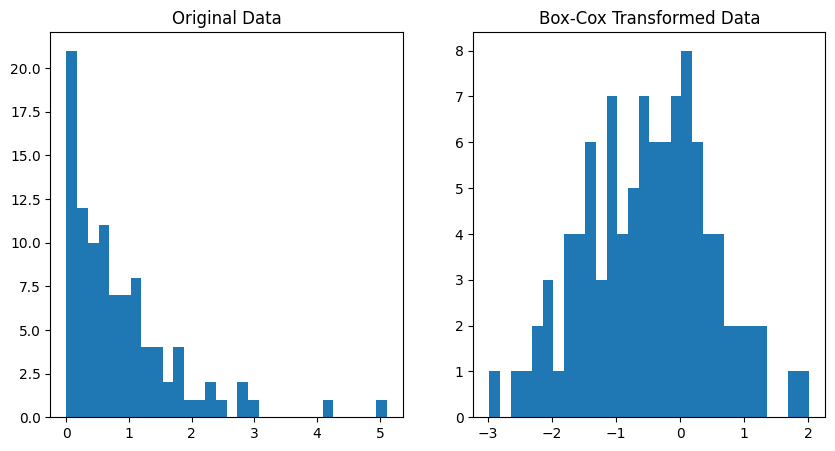

Optimal lambda value: 0.25347256675257707


In [218]:
from scipy import stats

data = np.random.exponential(scale=1, size=100)
transformed_data, lambda_value = stats.boxcox(data)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30)
plt.title('Box-Cox Transformed Data')

plt.show()
print(f"Optimal lambda value: {lambda_value}")

4. One-hot encoding

In [ ]:
data = {'color': ['yellow', 'green', 'blue', 'yellow', 'green']}
df = pd.DataFrame(data)
df

,color
0,yellow
1,green
2,blue
3,yellow
4,green


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[['color']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['color']))
final_df = pd.concat([df, encoded_df], axis=1)
final_df

,color,color_blue,color_green,color_yellow
0,yellow,0.0,0.0,1.0
1,green,0.0,1.0,0.0
2,blue,1.0,0.0,0.0
3,yellow,0.0,0.0,1.0
4,green,0.0,1.0,0.0


Activity question 6: Can you tell me the drawback of using one-hot encoding?

5. Ordinal/Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

data = {'color': ['red', 'green', 'blue', 'red', 'green', 'yellow']}
df = pd.DataFrame(data)
df

,color
0,red
1,green
2,blue
3,red
4,green
5,yellow


In [ ]:
encoder = LabelEncoder()
df['color_encoded'] = encoder.fit_transform(df['color'])
df

,color,color_encoded
0,red,2
1,green,1
2,blue,0
3,red,2
4,green,1
5,yellow,3


Activity question 7: Can you tell me the advantage of label encoding compared to one-hot encoding

Activity question 8: Can you tell me the drawback of using label encoding?

6. Model persistence with encoders (Optional)

## Useful Tools
Pandas **profiling**

In [167]:
# !pip install pandas-profiling
# !pip install pydantic-settings

In [166]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(churn_data, title="Pandas Profiling Report")
# ProfileReport(churn_data)

## Feature Engineering
1. Geometric example

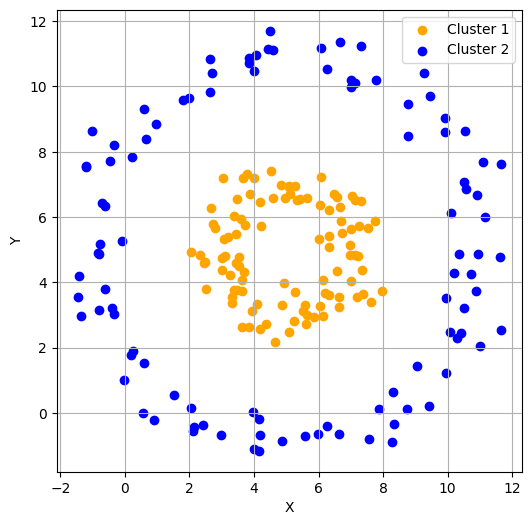

In [216]:
num_points = 100
radius1 = 2
radius2 = 6
angles = np.linspace(0, 2 * np.pi, num_points)

x1 = 5 + radius1 * np.cos(angles) + np.random.normal(0, 0.5, num_points)
y1 = 5 + radius1 * np.sin(angles) + np.random.normal(0, 0.5, num_points)
x2 = 5 + radius2 * np.cos(angles) + np.random.normal(0, 0.5, num_points)
y2 = 5 + radius2 * np.sin(angles) + np.random.normal(0, 0.5, num_points)

plt.figure(figsize=(6, 6))
plt.scatter(x1, y1, c="orange", label="Cluster 1")
plt.scatter(x2, y2, c="blue", label="Cluster 2")

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

In [201]:
df1 = pd.DataFrame({'x': x1, 'y': y1, 'class': 'A'})
df2 = pd.DataFrame({'x': x2, 'y': y2, 'class': 'B'})
dummy_data = pd.concat([df1, df2], ignore_index=True).sample(frac=1)
dummy_data.head()

,x,y,class
147,-0.592239,5.376448,B
196,11.104641,5.093791,B
120,7.066162,10.537332,B
165,0.729935,0.448123,B
111,9.922272,8.826214,B


In [213]:
dummy_data["rad"] = np.sqrt((dummy_data["x"] - 5)**2 + (dummy_data["y"] - 5)**2)

In [214]:
dummy_data.head()

,x,y,class,rad
147,-0.592239,5.376448,B,5.604895
196,11.104641,5.093791,B,6.105362
120,7.066162,10.537332,B,5.910251
165,0.729935,0.448123,B,6.241237
111,9.922272,8.826214,B,6.234475


<Axes: ylabel='rad'>

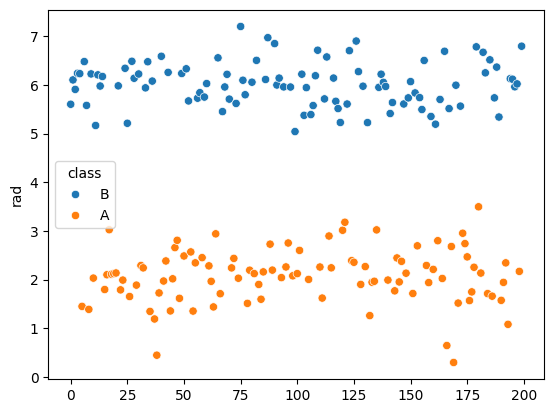

In [215]:
import seaborn as sns
sns.scatterplot(data=dummy_data, x=np.arange(200), y='rad', hue='class')

2. Count vectorizer

In [217]:
from sklearn.feature_extraction.text import CountVectorizer

documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

print("Feature Names:", feature_names)
print("Count Matrix:\n", X.toarray())

Feature Names: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
Count Matrix:
 [[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


3. TFIDF (Optional)

4. PCA

In [220]:
repay_loans.head(2)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672.0,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794.0,0,10984,2003-10-21,2005-07-17,1.25


In [226]:
repay_num = repay_loans.select_dtypes(include='number')

In [227]:
repay_num.head(2)

,client_id,loan_amount,repaid,loan_id,rate
0,46109,13672.0,0,10243,2.15
1,46109,9794.0,0,10984,1.25


In [243]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(repay_num)

x = StandardScaler().fit_transform(df)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['p1','p2','p3'])

In [230]:
pca.explained_variance_ratio_

array([0.22362845, 0.21681545, 0.20408722])

Text(0, 0.5, 'y')

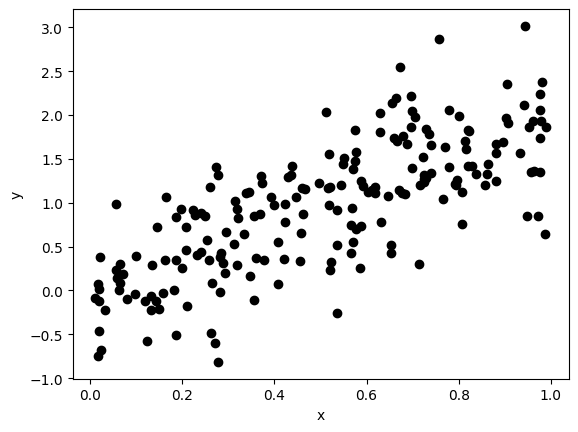

In [238]:
np.random.seed(0)
N=200
X = np.random.rand(N, 2)
X[:, 1] = 2 * X[:, 0] + np.random.normal(0, 0.5, N)
plt.scatter(X[:, 0], X[:, 1], c="k")
plt.xlabel("x")
plt.ylabel("y")

In [239]:
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

In [241]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.9498122 0.0501878]


5. Spectrogram (Optional)